
Text Classification
===================
based on https://lena-voita.github.io/nlp_course/text_classification.html

Text classification is an extremely popular task. You enjoy working text classifiers in your mail agent: it classifies letters and filters spam. Other applications include document classification, review classification, etc.

Text classifiers are often used not as an individual task, but as part of bigger pipelines. For example, a voice assistant classifies your utterance to understand what you want (e.g., set the alarm, order a taxi or just chat) and passes your message to different models depending on the classifier's decision. Another example is a web search engine: it can use classifiers to identify the query language, to predict the type of your query (e.g., informational, navigational, transactional), to understand whether you what to see pictures or video in addition to documents, etc.

Since most of the classification datasets assume that only one label is correct (you will see this right now!), in the lecture we deal with this type of classification, i.e. the single-label classification. We mention multi-label classification in a separate section ([Multi-Label Classification](#multi_label)).
<img src="https://lena-voita.github.io/resources/lectures/text_clf/intro/example_movie-min.png" width="30%">
<img src="https://lena-voita.github.io/resources/lectures/text_clf/intro/example_mail-min.png" width="30%">
<img src="https://lena-voita.github.io/resources/lectures/text_clf/intro/example_twitter-min.png" width="30%">
<img src="https://lena-voita.github.io/resources/lectures/text_clf/intro/example_document-min.png" width="30%">

Datasets for Classification
---------------------------

Datasets for text classification are very different in terms of size (both dataset size and examples' size), what is classified, and the number of labels. Look at the statistics below.

| Dataset | Type | Number  <br>of labels | Size  <br>(train/test) | Avg. length  <br>(tokens) |
| --- | --- | --- | --- | --- |
| [SST](https://nlp.stanford.edu/sentiment/index.html) | sentiment | 5 or 2 | 8.5k / 1.1k | 19  |
| [IMDb Review](https://ai.stanford.edu/~amaas/data/sentiment/) | sentiment | 2   | 25k / 25k | 271 |
| [Yelp Review](https://www.kaggle.com/yelp-dataset/yelp-dataset) | sentiment | 5 or 2 | 650k / 50k | 179 |
| [Amazon Review](https://www.kaggle.com/bittlingmayer/amazonreviews) | sentiment | 5 or 2 | 3m / 650k | 79  |
| [TREC](https://cogcomp.seas.upenn.edu/Data/QA/QC/) | question | 6   | 5.5k / 0.5k | 10  |
| [Yahoo! Answers](https://www.kaggle.com/soumikrakshit/yahoo-answers-dataset) | question | 10  | 1.4m / 60k | 131 |
| [AG’s News](http://groups.di.unipi.it/~gulli/AG_corpus_of_news_articles.html) | topic | 4   | 120k / 7.6k | 44  |
| [Sogou News](http://www.sogou.com/labs/resource/cs.php) | topic | 6   | 54k / 6k | 737 |
| [DBPedia](https://wiki.dbpedia.org/services-resources/dbpedia-data-set-2014) | topic | 14  | 560k / 70k | 67  |

Some of the datasets can be downloaded [here](https://course.fast.ai/datasets#nlp).

The most popular datasets are for sentiment classification. They consist of reviews of movies, places or restaurants, and products. There are also datasets for question type classification and topic classification.

To better understand typical classification tasks, below you can look at the examples from different datasets.


General View
============

Here we provide a general view on classification and introduce the notation. This section applies to both classical and neural approaches.

We assume that we have a collection of documents with ground-truth labels. The input of a classifier is a document $(x=(x_1,\dots, x_n))$ with tokens $((x_1, \dots, x_n))$, the output is a label $(y\in 1\dots k)$. Usually, a classifier estimates probability distribution over classes, and we want the probability of the correct class to be the highest.



Get Feature Representation and Classify
---------------------------------------

Text classifiers have the following structure:

<img src="https://lena-voita.github.io/resources/lectures/text_clf/general/idea-min.png" width="50%" align="right">

* feature extractor  
    A feature extractor can be either manually defined (as in [classical approaches](#classical_approaches)) or learned (e.g., with [neural networks](#neural_approaches)).
* classifier  
    A classifier has to assign class probabilities given feature representation of a text. The most common way to do this is using [logistic regression](#logistic_regression), but other variants are also possible (e.g., [Naive Bayes](#naive_bayes) classifier or [SVM](#svm)).

In this lecture, we'll mostly be looking at different ways to build feature representation of a text and to use this representation to get class probabilities.


Generative (Joint) and Discriminative (Conditional) Models
------------------------------------

<img src="https://lena-voita.github.io/resources/lectures/text_clf/general/generative_discriminative-min.png" witdth="60%">

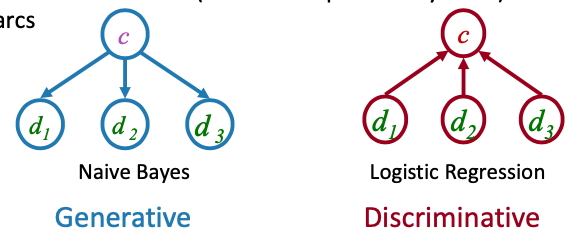

A classification model can be either generative or discriminative.

* generative models  
    Generative models learn joint probability distribution of data $(p(x, y) = p(x|y)\cdot p(y))$. To make a prediction given an input $x$, these models pick a class with the highest joint probability: $(y = \arg \max\limits_{k}p(x|y=k)\cdot p(y=k))$.
* discriminative models  
    Discriminative models are interested only in the conditional probability $(p(y|x))$, i.e. they learn only the border between classes. To make a prediction given an input $x$, these models pick a class with the highest conditional probability: $(y = \arg \max\limits_{k}p(y=k|x))$.

In this lecture, we will meet both generative and discriminative models.


Classical Methods for Text Classification
=========================================

In this part, we consider classical approaches for text classification. They were developed long before neural networks became popular, and for small datasets can still perform comparably to neural models.


Naive Bayes Classifier
----------------------

A high-level idea of the Naive Bayes approach is given below: we rewrite the conditional class probability $P(y=k|x)$ using Bayes's rule and get $P(x|y=k)\cdot P(y=k)$.

<img src="https://lena-voita.github.io/resources/lectures/text_clf/bayes/main_equation-min.png" witdth="80%">


### This is a generative model!

<img src="https://lena-voita.github.io/resources/lectures/text_clf/bayes/is_generative-min.png" witdth="80%">

Naive Bayes is a generative model: it models the joint probability of data.

Note also the terminology:

* prior probability $P(y=k)$: class probability before looking at data (i.e., before knowing $x$;
* posterior probability $P(y=k|x)$: class probability after looking at data (i.e., after knowing the specific $x$;
* joint probability $P(x, y)$: the joint probability of data (i.e., both examples $x$ and labels $y$;
* maximum a posteriori (MAP) estimate: we pick the class with the highest posterior probability.

### How to define P(x|y=k) and P(y=k)?

### P(y=k): count labels

$P(y=k)$ is very easy to get: we can just evaluate the proportion of documents with the label $k$ (this is the maximum likelihood estimate, MLE). Namely, \\[P(y=k)=\frac{N(y=k)}{\sum\limits_{i}N(y=i)},\\] where $N(y=k)$ is the number of examples (documents) with the label $k$.

### P(x|y=k): use the "naive" assumptions, then count

Here we assume that document $x$ is represented as a set of features, e.g., a set of its words $(x_1, \dots, x_n)$: \\[P(x| y=k)=P(x_1, \dots, x_n|y).\\]

The Naive Bayes assumptions are

* Bag of Words assumption: word order does not matter,
* Conditional Independence assumption: features (words) are independent given the class.

Intuitively, we assume that the probability of each word to appear in a document with class $k$ does not depend on context (neither word order nor other words at all). For example, we can say that awesome, brilliant, great are more likely to appear in documents with a positive sentiment and awful, boring, bad are more likely in negative documents, but we know nothing about how these (or other) words influence each other.

With these "naive" assumptions we get: \\[P(x| y=k)=P(x_1, \dots, x_n|y)=\prod\limits_{t=1}^nP(x_t|y=k).\\] The probabilities $P(x_i|y=k)$ are estimated as the proportion of times the word $x_i$ appeared in documents of class $k$ among all tokens in these documents: \\[P(x_i|y=k)=\frac{N(x_i, y=k)}{\sum\limits_{t=1}^{|V|}N(x_t, y=k)},\\] where $N(x_i, y=k)$ is the number of times the token $x_i$ appeared in documents with the label $k$, $V$ is the vocabulary (more generally, a set of all possible features).

### What if $N(x_i, y=k)=0$? Need to avoid this!

What if $N(x_i, y=k)=0$, i.e. in training we haven't seen the token $x_i$ in the documents with class $k$? This will null out the probability of the whole document, and this is not what we want! For example, if we haven't seen some rare words (e.g., pterodactyl or abracadabra) in training positive examples, it does not mean that a positive document can never contain these words.

<img src="https://lena-voita.github.io/resources/lectures/text_clf/bayes/need_smoothing-min.png" witdth="80%">

To avoid this, we'll use a simple trick: we add to counts of all words a small $\delta$: \\[P(x_i|y=k)=\frac{\color{red}{\delta} +\color{black} N(x_i, y=k) }{\sum\limits_{t=1}^{|V|}(\color{red}{\delta} +\color{black}N(x_t, y=k))} = \frac{\color{red}{\delta} +\color{black} N(x_i, y=k) }{\color{red}{\delta\cdot |V|}\color{black} + \sum\limits_{t=1}^{|V|}\color{black}N(x_t, y=k)} ,\\] where $\delta$ can be chosen using cross-validation.

Note: this is Laplace smoothing (aka Add-1 smoothing if $\delta=1$. We'll learn more about smoothings in the next lecture when talking about Language Modeling.

### Making a Prediction

As we already mentioned, Naive Bayes (and, more broadly, generative models) make a prediction based on the joint probability of data and class: \\[y^{\ast} = \arg \max\limits_{k}P(x, y=k) = \arg \max\limits_{k} P(y=k)\cdot P(x|y=k).\\]

Intuitively, Naive Bayes expects that some words serve as class indicators. For example, for sentiment classification tokens awesome, brilliant, great will have higher probability given positive class then negative. Similarly, tokens awful, boring, bad will have higher probability given negative class then positive.

<img src="https://lena-voita.github.io/resources/lectures/text_clf/bayes/example-min.png" witdth="80%">

  
  


### Worked Sentiment Example with add-1 Smoothing

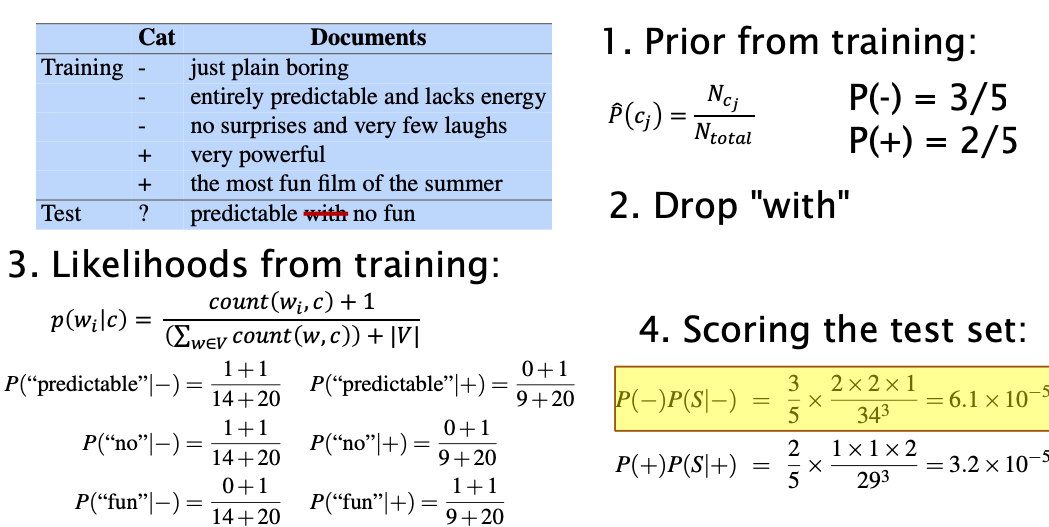


### Final Notes on Naive Bayes

### Practical Note: Sum of Log-Probabilities Instead of Product of Probabilities

The main expression Naive Bayes uses for classification is a product lot of probabilities: \\[P(x, y=k)=P(y=k)\cdot P(x_1, \dots, x_n|y)=P(y=k)\cdot \prod\limits_{t=1}^nP(x_t|y=k).\\] A product of many probabilities may be very unstable numerically. Therefore, usually instead of $P(x, y)$ we consider $\log P(x, y)$: \\[\log P(x, y=k)=\log P(y=k) + \sum\limits_{t=1}^n\log P(x_t|y=k).\\] Since we care only about argmax, we can consider $\log P(x, y)$ instead of $P(x, y)$.

Important! Note that in practice, we will usually deal with log-probabilities and not probabilities.

### View in the General Framework


<img src="https://lena-voita.github.io/resources/lectures/text_clf/bayes/bayes_features-min.png" width="50%" align="right">
Remember our [general view](#general_view) on the classification task? We obtain feature representation of the input text using some method, then use this feature representation for classification.

In Naive Bayes, our features are words, and the feature representation is the Bag-of-Words (BOW) representation - a sum of one-hot representations of words. Indeed, to evaluate $P(x, y)$ we only need to number of times each token appeared in the text.




### Feature Design

In the standard setting, we used words as features. However, you can use other types of features: URL, user id, etc.


Maximum Entropy Classifier (aka Logistic Regression)
----------------------------------------------------

Differently from Naive Bayes, MaxEnt classifier is a discriminative model, i.e., we are interested in $P(y=k|x)$ and not in the joint distribution $p(x, y)$. Also, we will learn how to use features: this is in contrast to Naive Bayes, where we defined how to use the features ourselves.

Here we also have to define features manually, but we have more freedom: features do not have to be categorical (in Naive Bayes, they had to!). We can use the BOW representation or come up with something more interesting.

The general classification pipeline here is as follows:

* get $\color{#7aab00}{h}\color{black}=(\color{#7aab00}{f_1}\color{black}, \color{#7aab00}{f_2}\color{black}, \dots, \color{#7aab00}{f_n}\color{black}{)}$ - feature representation of the input text;
* take $w^{(i)}=(w_1^{(i)}, \dots, w_n^{(i)})$ \- vectors with feature weights for each of the classes;
* for each class, weigh features, i.e. take the dot product of feature representation $\color{#7aab00}{h}$ with feature weights $w^{(k)}$: \\[w^{(k)}\color{#7aab00}{h}\color{black} = w_1^{(k)}\cdot\color{#7aab00}{f_1}\color{black}+\dots+ w_n^{(k)}\cdot\color{#7aab00}{f_n}\color{black}{, \ \ \ \ \ k=1, \dots, K.} \\] To get a bias term in the sum above, we define one of the features being 1 (e.g., $\color{#7aab00}{f_0}=1$. Then \\[w^{(k)}\color{#7aab00}{h}\color{black} = \color{red}{w_0^{(k)}}\color{black} + w_1^{(k)}\cdot\color{#7aab00}{f_1}\color{black}+\dots+ w_n^{(k)}\cdot\color{#7aab00}{f_{n}}\color{black}{, \ \ \ \ \ k=1, \dots, K.} \\]
* get class probabilities using softmax: \\[P(class=k|\color{#7aab00}{h}\color{black})= \frac{\exp(w^{(k)}\color{#7aab00}{h}\color{black})}{\sum\limits_{i=1}^K \exp(w^{(i)}\color{#7aab00}{h}\color{black})}.\\] Softmax normalizes the $K$ values we got at the previous step to a probability distribution over output classes.

Look at the illustration below (classes are shown in different colors).

<img src="https://lena-voita.github.io/resources/lectures/text_clf/maxent/idea-min.png" witdth="60%">

  
  

### Training: Maximum Likelihood Estimate

Given training examples $x^1, \dots, x^N$ with labels $y^1, \dots, y^N$, $y^i\in\{1, \dots, K\}$, we pick those weights $w^{(k)}, k=1..K$ which maximize the probability of the training data: \\[w^{\ast}=\arg \max\limits_{w}\sum\limits_{i=1}^N\log P(y=y^i|x^i).\\] In other words, we choose parameters such that the data is more likely to appear. Therefore, this is called the **Maximum Likelihood Estimate (MLE) of the parameters.

To find the parameters maximizing the data log-likelihood, we use gradient ascent: gradually improve weights during multiple iterations over the data. At each step, we maximize the probability a model assigns to the correct class.

### Equvalence to minimizing cross-entropy

Note that maximizing data log-likelihood is equivalent to minimizing cross entropy between the target probability distribution $p^{\ast} = (0, \dots, 0, 1, 0, \dots)$ (1 for the target label, 0 for the rest) and the predicted by the model distribution $p=(p_1, \dots, p_K), p_i=p(i|x)$: \\[Loss(p^{\ast}, p^{})= - p^{\ast} \log(p) = -\sum\limits_{i=1}^{K}p_i^{\ast} \log(p_i).\\] Since only one of $p_i^{\ast}$ is non-zero (1 for the target label $k$, 0 for the rest), we will get $Loss(p^{\ast}, p) = -\log(p_{k})=-\log(p(k| x)).$

<img src="https://lena-voita.github.io/resources/lectures/text_clf/maxent/mle_cross_entropy-min.png" witdth="60%">

This equivalence is very important for you to understand: when talking about neural approaches, people usually say that they minimize the cross-entropy loss. Do not forget that this is the same as maximizing the data log-likelihood.



### Naive Bayes vs Logistic Regression

<img src="https://lena-voita.github.io/resources/lectures/text_clf/maxent/bayes_vs_maxent-min.png" witdth="60%">

Let's finalize this part by discussing the advantages and drawbacks of logistic regression and Naive Bayes.

* simplicity  
    Both methods are simple; Naive Bayes is the simplest one.
* interpretability  
    Both methods are interpretable: you can look at the features which influenced the predictions most (in Naive Bayes - usually words, in logistic regression - whatever you defined).
* training speed  
    Naive Bayes is very fast to train - it requires only one pass through the training data to evaluate the counts. For logistic regression, this is not the case: you have to go over the data many times until the gradient ascent converges.
* independence assumptions  
    Naive Bayes is too "naive" - it assumed that features (words) are conditionally independent given class. Logistic regression does not make this assumption - we can hope it is better.
* text representation: manual  
    Both methods use manually defined feature representation (in Naive Bayes, BOW is the standard choice, but you still choose this yourself). While manually defined features are good for interpretability, they may be no so good for performance - you are likely to miss something which can be useful for the task.



Text Classification with Neural Networks
========================================

Instead of manually defined features, let a neural network to **learn useful features**.

The main idea of neural-network-based classification is that feature representation of the input text can be obtained using a neural network. In this setting, we feed the embeddings of the input tokens to a neural network, and this neural network gives us a vector representation of the input text. After that, this vector is used for classification.

<img src="https://lena-voita.github.io/resources/lectures/text_clf/neural/general_vs_nns_linear-min.png" witdth="60%">

When dealing with neural networks, we can think about the classification part (i.e., how to get class probabilities from a vector representation of a text) in a very simple way.

<img src="https://lena-voita.github.io/resources/lectures/text_clf/neural/classification_part_explained-min.png" width="50%" align="right">

Vector representation of a text has some dimensionality $d$, but in the end, we need a vector of size $K$ (probabilities for $K$ classes). To get a $K$-sized vector from a $d$-sized, we can use a linear layer. Once we have a $K$-sized vector, all is left is to apply the softmax operation to convert the raw numbers into class probabilities.

### Classification Part: This is Logistic Regression!

Let us look closer to the neural network classifier. The way we use vector representation of the input text is exactly the same as we did with logistic regression: we weigh features according to feature weights for each class. The only difference from logistic regression is where the features come from: they are either defined manually (as we did before) or obtained by a neural network.

<img src="https://lena-voita.github.io/resources/lectures/text_clf/neural/nn_linear_with_logreg-min.png" witdth="60%">

### Intuition: Text Representation Points in the Direction of Class Representation

<img src="https://lena-voita.github.io/resources/lectures/text_clf/neural/linear_layer_intuition-min.png" witdth="60%">


If we look at this final linear layer more closely, we will see that the columns of its matrix are vectors $w_i$. These vectors can be thought of as vector representations of classes. A good neural network will learn to represent input texts in such a way that text vectors will point in the direction of the corresponding class vectors.

Training and the Cross-Entropy Loss
-----------------------------------

Neural classifiers are trained to predict probability distributions over classes. Intuitively, at each step we maximize the probability a model assigns to the correct class.

The standard loss function is the cross-entropy loss. Cross-entropy loss for the target probability distribution $p^{\ast} = (0, \dots, 0, 1, 0, \dots)$ (1 for the target label, 0 for the rest) and the predicted by the model distribution $p=(p\_1, \dots, p\_K), p\_i=p(i|x)$: \\[Loss(p^{\ast}, p^{})= - p^{\ast} \log(p) = -\sum\limits\_{i=1}^{K}p\_i^{\ast} \log(p\_i).\\] Since only one of $p\_i^{\ast}$ is non-zero (1 for the target label $k$, 0 for the rest), we will get $Loss(p^{\ast}, p) = -\log(p\_{k})=-\log(p(k| x)).$ Look at the illustration for one training example.

<img src="https://lena-voita.github.io/resources/lectures/text_clf/neural/cross_entropy-min.png" witdth="60%">

In training, we gradually improve model weights during multiple iterations over the data: we iterate over training examples (or batches of examples) and make gradient updates. At each step, we maximize the probability a model assigns to the correct class. At the same time, we minimize sum of the probabilities of incorrect classes: since sum of all probabilities is constant, by increasing one probability we decrease sum of all the rest (Lena: Here I usually imagine a bunch of kittens eating from the same bowl: one kitten always eats at the expense of the others).

Look at the illustration of the training process.

<img src="https://lena-voita.github.io/resources/lectures/text_clf/neural/nn_clf_training.gif" witdth="60%">
  

### Recap: This is equivalent to maximizing the data likelihood

Do not forget that [when talking about MaxEnt classifier (logistic regression)](#max_mle_min_xent), we showed that minimizing cross-entropy is equivalent to maximizing the data likelihood. Therefore, here we are also trying to get the Maximum Likelihood Estimate (MLE) of model parameters.

Models for Text Classification
------------------------------

We need a model that can produce a **fixed-sized** vector for inputs of **different** lengths.

<img src="https://lena-voita.github.io/resources/lectures/text_clf/neural/model_template-min.png" width="50%" align="right">

In this part, we will look at different ways to get a vector representation of an input text using neural networks. Note that while input texts can have different lengths, the vector representation of a text has to have a fixed size: otherwise, a network will not "work".

We begin with the simplest approaches which use only word embeddings (without adding a model on top of that). Then we look at recurrent and convolutional networks.

Basics: Bag of Embeddings (BOE) and Weighted BOE
------------------------------------------------

The simplest you can do is use only word embeddings without any neural network on top of that. To get vector representation of a text, we can either sum all token embeddings (Bag of Embeddings) or use a weighted sum of these embeddings (with weights, for example, being tf-idf or something else).

Bag of Embeddings (ideally, along with Naive Bayes) should be a baseline for any model with a neural network: if you can't do better than that, it's not worth using NNs at all. This can be the case if you don't have much data.

<img src="https://lena-voita.github.io/resources/lectures/text_clf/neural/bow_tfidf-min.png" width="60%">

While Bag of Embeddings (BOE) is sometimes called Bag of Words (BOW), note that these two are very different. BOE is the sum of embeddings and BOW is the sum of one-hot vectors: BOE knows a lot more about language. The pretrained embeddings (e.g., Word2Vec or GloVe) understand similarity between words. For example, awesome, brilliant, great will be represented with unrelated features in BOW but similar word vectors in BOE.

Note also that to use a weighted sum of embeddings, you need to come up with a way to get weights. However, this is exactly what we wanted to avoid by using neural networks: we don't want to introduce manual features, but rather let a network to learn useful patterns.

### Bag of Embeddings as Features for SVM

You can use SVM on top of BOE! The only difference from SVMs in classical approaches (on top of bag-of-words and bag-of-ngrams) if the choice of a kernel: here the RBF kernel is better.


Models: Recurrent (RNN/LSTM/etc)
--------------------------------

Recurrent networks are a natural way to process text in a sense that, similar to humans, they "read" a sequence of tokens one by one and process the information. Hopefully, at each step the network will "remember" everything it has read before.

### Basics: Recurrent Neural Networks

#### • RNN cell

At each step, a recurrent network receives a new input vector (e.g., token embedding) and the previous network state (which, hopefully, encodes all previous information). Using this input, the RNN cell computes the new state which it gives as output. This new state now contains information about both current input and the information from previous steps.

<img src="https://lena-voita.github.io/resources/lectures/text_clf/neural/rnn/rnn_reads_text.gif" width="50%" align="right">

#### • RNN reads a sequence of tokens

<img src="https://lena-voita.github.io/resources/lectures/text_clf/neural/rnn/general_cell-min.png" width="50%" align="right">

Look at the illustration: RNN reads a text token by token, at each step using a new token embedding and the previous state.

Note that the RNN cell is the same at each step!

#### • Vanilla RNN

<img src="https://lena-voita.github.io/resources/lectures/text_clf/neural/rnn/vanilla_cell-min.png" width="50%" align="right">

The simplest recurrent network, Vanilla RNN, transforms $h_{t-1}$ and $x\_t$ linearly, then applies a non-linearity (most often, the $\tanh$ function): \\[h\_t = \tanh(h_{t-1}W\_h + x\_tW_t).\\]


Vanilla RNNs suffer from the vanishing and exploding gradients problem. To alleviate this problem, more complex recurrent cells (e.g., LSTM, GRU, etc) perform several operations on the input and use gates. For more details of RNN basics, look at the [Colah's blog post](https://colah.github.io/posts/2015-08-Understanding-LSTMs/).

### Recurrent Neural Networks for Text Classification

Here we (finally!) look at how we can use recurrent models for text classification. Everything you will see here will apply to all recurrent cells, and by "RNN" in this part I refer to recurrent cells in general (e.g. vanilla RNN, LSTM, GRU, etc).

Let us recall what we need:

We need a model that can produce a **fixed-sized** vector for inputs of **different** lengths.

#### • Simple: read a text, take the final state

<img src="https://lena-voita.github.io/resources/lectures/text_clf/neural/rnn/rnn_final_state-min.png" width="50%" align="right">

The most simple recurrent model is a one-layer RNN network. In this network, we have to take the state which knows more about input text. Therefore, we have to use the last state - only this state saw all input tokens.


#### • Multiple layers: feed the states from one RNN to the next one


To get a better text representation, you can stack multiple layers. In this case, inputs for the higher RNN are representations coming from the previous layer.

The main hypothesis is that with several layers, lower layers will catch local phenomena (e.g., phrases), while higher layers will be able to learn more high-level things (e.g., topic).

<img src="https://lena-voita.github.io/resources/lectures/text_clf/neural/rnn/multi_layer-min.png" width="50%" align="right">

#### • Bidirectional: use final states from forward and backward RNNs.

Previous approaches may have a problem: the last state can easily "forget" earlier tokens. Even strong models such as LSTMs can still suffer from that!

To avoid this, we can use two RNNs: forward, which reads input from left to right, and backward, which reads input from right to left. Then we can use the final states from both models: one will better remember the final part of a text, another - the beginning. These states can be concatenated, or summed, or something else - it's your choice!

<img src="https://lena-voita.github.io/resources/lectures/text_clf/neural/rnn/bidirectional-min.png" width="60%">

#### • Combinations: do everything you want!

You can combine the ideas above. For example, in a multi-layered network, some layers can go in the opposite direction, etc.



Models: Convolutional (CNN)
---------------------------

The detailed description of convolutional models in general is in [Convolutional Models Supplementary](./models/convolutional.html). In this part, we consider only convolutions for text classification.

#### Convolutions for Images and Translation Invariance

Convolutional networks were originally developed for computer vision tasks. Therefore, let's first understand the intuition behind convolutional models for images.

Imagine we want to classify an image into several classes, e.g. cat, dog, airplane, etc. In this case, if you find a cat on an image, you don't care where on the image this cat is: you care only that it is there somewhere.

<img src="https://lena-voita.github.io/resources/lectures/models/cnn/translation_cats-min.png" width="60%">

<img src="https://lena-voita.github.io/resources/lectures/models/cnn/cnn_with_cat.gif" width="20%" align="right">

Convolutional networks apply the same operation to small parts of an image: this is how they extract features. Each operation is looking for a match with a pattern, and a network learns which patterns are useful. With a lot of layers, the learned patterns become and more complicated: from lines in the early layers to very complicated patterns (e.g., the whole cat or dog) on the upper ones. You can look at the examples in the [Analysis and Interpretability](#analysis_interpretability) section.

This property is called translation invariance: translation because we are talking about shifts in space, invariance because we want it to not matter.

  
The illustration is adapted from the one taken from [this cool repo](https://github.com/vdumoulin/conv_arithmetic).

#### Convolutions for Text

Well, for images it's all clear: e.g. we want to be able to move a cat because we don't care where the cat is. But what about texts? At first glance, this is not so straightforward: we can not move phrases easily - the meaning will change or we will get something that does not make much sense.

However, there are some applications where we can think of the same intuition. Let's imagine that we want to classify texts, but not cats/dogs as in images, but positive/negative sentiment. Then there are some words and phrases which could be very informative "clues" (e.g. **it's been great**, **bored to death**, **absolutely amazing**, **the best ever**, etc), and others which are not important at all. We don't care much where in a text we saw **bored to death** to understand the sentiment, right?

<img src="https://lena-voita.github.io/resources/lectures/models/cnn/translation_texts-min.png" width="60%">

#### A Typical Model: Convolution+Pooling Blocks

Following the intuition above, we want to detect some patterns, but we don't care much where exactly these patterns are. This behavior is implemented with two layers:

* convolution: finds matches with patterns (as the cat head we saw above);
* pooling: aggregates these matches over positions (either locally or globally).

A typical convolutional model for text classification is shown on the figure. To get a vector representation of an input text, a convolutional layer is applied to word embedding, which is followed by a non-linearity (usually ReLU) and a pooling operation. The way this representation is used for classification is similar to other networks.

<img src="https://lena-voita.github.io/resources/lectures/text_clf/neural/cnn/model_general-min.png" width="60%">

In the following, we discuss in detail the main building blocks, convolution and pooling, then consider modeling modifications.

### Basics: Convolution Layer for Text

<img src="https://lena-voita.github.io/resources/lectures/models/cnn/same_padding_no_strides.gif" width="20%" align="right">

Convolutional Neural Networks were initially developed for computer vision tasks, e.g. classification of images (cats vs dogs, etc). The idea of a convolution is to go over an image with a sliding window and to apply the same operation, convolution filter, to each window.

The illustration (taken from [this cool repo](https://github.com/vdumoulin/conv_arithmetic)) shows this process for one filter: the bottom is the input image, the top is the filter output. Since an image has two dimensions (width and height), the convolution is two-dimensional.


Convolution filter for images. The illustration is from [this cool repo](https://github.com/vdumoulin/conv_arithmetic).

<img src="https://lena-voita.github.io/resources/lectures/models/cnn/cnn_filter_reads_text.gif" width="30%" align="right">

Differently from images, texts have only one dimension: here a convolution is one-dimensional: look at the illustration.

Convolution filter for text.

#### Convolution is a Linear Operation Applied to Each Window

<img src="https://lena-voita.github.io/resources/lectures/models/cnn/convolution_linear_layer-min.png" width="60%">

A convolution is a linear layer (followed by a non-linearity) applied to each input window. Formally, let us assume that

* $(x_1, \dots, x_n)$ - representations of the input words, $x_i\in \mathbb{R}^d$;
* $d$ (input channels) \- size of an input embedding;
* $k$ (kernel size) \- the length of a convolution window (on the illustration, $k=3$;
* $m$ (output channels) \- number of convolution filters (i.e., number of channels produced by the convolution).

Then a convolution is a linear layer $W\in\mathbb{R}^{(k\cdot d)\times m}$. For a $k$-sized window $(x_i, \dots x_{i+k-1})$, the convolution takes the concatenation of these vectors \\[u_i = [x_i, \dots x_{i+k-1}]\in\mathbb{R}^{k\cdot d}\] and multiplies by the convolution matrix: \\[F_i = u_i \times W.\\] A convolution goes over an input with a sliding window and applies the same linear transformation to each window.

#### Intuition: Each Filter Extracts a Feature

Intuitively, each filter in a convolution extracts a feature.



### • One filter \- one feature extractor

<img src="https://lena-voita.github.io/resources/lectures/models/cnn/one_filter-min.png" width="30%" align="right">


A filter takes vector representations in a current window and transforms them linearly into a single feature. Formally, for a window \\[u_i = [x_i, \dots x_{i+k-1}]\in\mathbb{R}^{k\cdot d}\] a filter $f\in\mathbb{R}^{k\cdot d}$ computes dot product: \\[F_i^{(f)} = (f, u_i).\\] The number $F_i^{(f)}$ (the extracted "feature") is a result of applying the filter $f$ to the window $(x_i, \dots x_{i+k-1})$.

#### • m filters: m feature extractors

<img src="https://lena-voita.github.io/resources/lectures/models/cnn/several_filters_read.gif" width="30%" align="left">

<img src="https://lena-voita.github.io/resources/lectures/models/cnn/several_filters-min.png" width="30%" align="right">

One filter extracts a single feature. Usually, we want many features: for this, we have to take several filters. Each filter reads an input text and extracts a different feature - look at the illustration. The number of filters is the number of output features you want to get. With $m$ filters instead of one, the size of the convolutional layer we discussed above will become $(k\cdot d)\times m$.



This is done in parallel! Note that while I show you how a CNN "reads" a text, in practice these computations are done in parallel.

### Basics: Pooling Operation

After a convolution extracted $m$ features from each window, a pooling layer summarises the features in some region. Pooling layers are used to reduce the input dimension, and, therefore, to reduce the number of parameters used by the network.

#### • Max and Mean Pooling

The most popular is max-pooling: it takes maximum over each dimension, i.e. takes the maximum value of each feature.

<img src="https://lena-voita.github.io/resources/lectures/models/cnn/max_pooling-min.png" width="60%">

Intuitively, each feature "fires" when it sees some pattern: a visual pattern in an image (line, texture, a cat's paw, etc) or a text pattern (e.g., a phrase). After a pooling operation, we have a vector saying which of these patterns occurred in the input.

Mean-pooling works similarly but computes mean over each feature instead of maximum.

#### • Pooling and Global Pooling

Similarly to convolution, pooling is applied to windows of several elements. Pooling also has the stride parameter, and the most common approach is to use pooling with non-overlapping windows. For this, you have to set the stride parameter the same as the pool size. Look at the illustration.

<img src="https://lena-voita.github.io/resources/lectures/models/cnn/pooling_with_stride-min.png" width="60%">

The difference between pooling and global pooling is that pooling is applied over features in each window independently, while global pooling performs over the whole input. For texts, global pooling is often used to get a single vector representing the whole text; such global pooling is called max-over-time pooling, where the "time" axis goes from the first input token to the last.

<img src="https://lena-voita.github.io/resources/lectures/models/cnn/pooling_vs_global-min.png" width="60%">

Intuitively, each feature "fires" when it sees some pattern: a visual pattern in an image (line, texture, a cat's paw, etc) or a text pattern (e.g., a phrase). After a pooling operation, we have a vector saying which of these patterns occurred in the input.

### Convolutional Neural Networks for Text Classification

Now, when we understand how the convolution and pooling work, let's come to modeling modifications. First, let us recall what we need:

We need a model that can produce a **fixed-sized** vector for inputs of **different** lengths.

Therefore, we need to construct a convolutional model that represents a text as a single vector.

The basic convolutional model for text classification is shown on the figure. It is almost the same as we saw before: the only thing that's changed is that we specified the type of pooling used. Specifically, after the convolution, we use global-over-time pooling. This is the key operation: it allows to compress a text into a single vector. The model itself can be different, but at some point it has to use the global pooling to compress input in a single vector.

<img src="https://lena-voita.github.io/resources/lectures/text_clf/neural/cnn/model_basic-min.png" width="60%">

#### • Several Convolutions with Different Kernel Sizes

Instead of picking one kernel size for your convolution, you can use several convolutions with different kernel sizes. The recipe is simple: apply each convolution to the data, add non-linearity and global pooling after each of them, then concatenate the results (on the illustration, non-linearity is omitted for simplicity). This is how you get vector representation of the data which is used for classification.

<img src="https://lena-voita.github.io/resources/lectures/text_clf/neural/cnn/several_kernel_sizes-min.png" width="60%">

This idea was used, among others, in the paper [Convolutional Neural Networks for Sentence Classification](https://www.aclweb.org/anthology/D14-1181.pdf) and many follow-ups.

#### • Stack Several Blocks Convolution+Pooling

Instead of one layer, you can stack several blocks convolution+pooling on top of each other. After several blocks, you can apply another convolution, but with global pooling this time. Remember: you have to get a single fixed-sized vector - for this, you need global pooling.

Such multi-layered convolutions can be useful when your texts are very long; for example, if your model is character-level (as opposed to word-level).

<img src="https://lena-voita.github.io/resources/lectures/text_clf/neural/cnn/several_blocks-min.png" width="60%">

This idea was used, among others, in the paper [Character-level Convolutional Networks for Text Classification](https://papers.nips.cc/paper/5782-character-level-convolutional-networks-for-text-classification.pdf).
